In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web


In [4]:
import yfinance as yf
yf.pdr_override()


In [5]:
tickers = ["TSLA" ,"F", "TM", "GM", "HMC","BYD","BMW.DE","MBG.DE"]

carteira = web.get_data_yahoo(tickers, start="2020-01-01", end="2022-01-01")["Adj Close"]

[*********************100%%**********************]  8 of 8 completed


In [6]:
carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 517 entries, 2020-01-02 to 2021-12-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMW.DE  509 non-null    float64
 1   BYD     505 non-null    float64
 2   F       505 non-null    float64
 3   GM      505 non-null    float64
 4   HMC     505 non-null    float64
 5   MBG.DE  509 non-null    float64
 6   TM      505 non-null    float64
 7   TSLA    505 non-null    float64
dtypes: float64(8)
memory usage: 36.4 KB


In [7]:
#primeira linha
carteira.head()

,BMW.DE,BYD,F,GM,HMC,MBG.DE,TM,TSLA
Date,,,,,,,,
2020-01-02,58.847408,29.498899,8.077005,36.477726,26.480253,39.601479,142.240005,28.684000
2020-01-03,58.133816,29.135687,7.896945,35.443306,26.008711,38.884331,140.750000,29.534000
2020-01-06,57.919746,29.184769,7.854074,34.974895,25.934744,38.674343,140.770004,30.102667
2020-01-07,58.847408,28.988440,7.931241,34.301552,26.082680,38.983387,141.509995,31.270666
2020-01-08,58.998058,29.243671,7.931241,33.813625,26.008711,39.201309,141.160004,32.809334


In [8]:
#ultima linha
carteira.tail()

,BMW.DE,BYD,F,GM,HMC,MBG.DE,TM,TSLA
Date,,,,,,,,
2021-12-27,77.094658,64.023895,18.229210,56.727432,27.432402,59.894241,185.899994,364.646667
2021-12-28,77.051826,63.415276,18.194157,56.411350,27.422680,59.645721,184.750000,362.823334
2021-12-29,76.409378,63.827557,18.018877,56.529881,27.403231,58.471664,183.679993,362.063324
2021-12-30,75.801178,64.190788,17.939999,57.418873,27.461576,57.923191,184.080002,356.779999
2021-12-31,NaN,64.367477,18.202925,57.912750,27.665787,NaN,185.300003,352.260010


In [9]:
carteira.iloc()

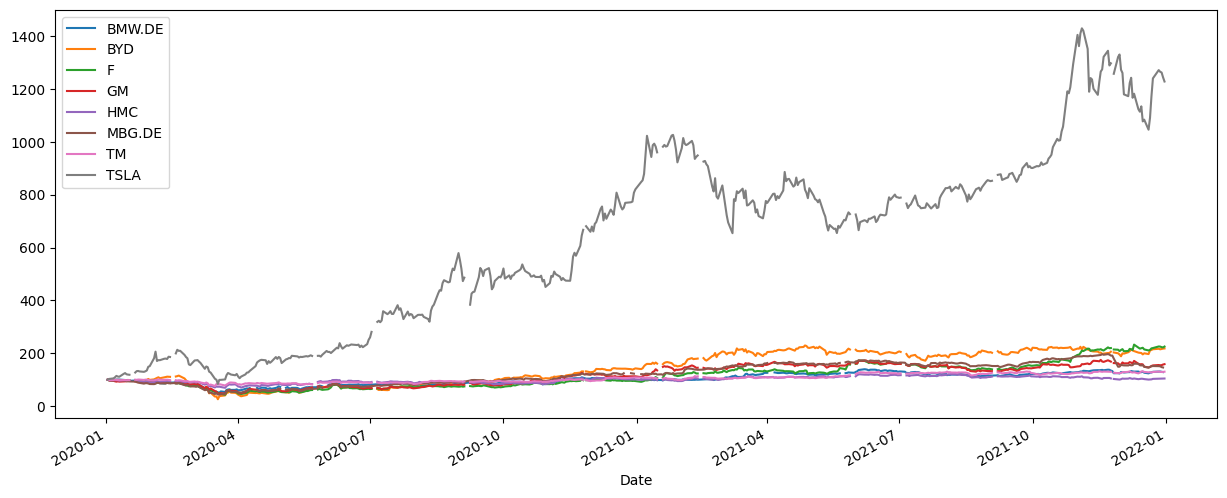

In [10]:
#normalizxando para base 100 e plotando o grafico
(carteira / carteira.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [11]:
returns = (carteira / carteira.shift(1)) - 1
returns.head()

,BMW.DE,BYD,F,GM,HMC,MBG.DE,TM,TSLA
Date,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.012126,-0.012313,-0.022293,-0.028358,-0.017807,-0.018109,-0.010475,0.029633
2020-01-06,-0.003682,0.001685,-0.005429,-0.013216,-0.002844,-0.005400,0.000142,0.019255
2020-01-07,0.016016,-0.006727,0.009825,-0.019252,0.005704,0.007991,0.005257,0.038801
2020-01-08,0.002560,0.008805,0.000000,-0.014225,-0.002836,0.005590,-0.002473,0.049205


In [16]:
#criando um portfólio com pesos iguais. Criando um  array, chamado “weights”
weights = np.array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])
weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [17]:
annual_returns = returns.mean() * 250
annual_returns

BMW.DE    0.180732
BYD       0.696511
F         0.498470
GM        0.287297
HMC       0.048598
MBG.DE    0.300968
TM        0.147391
TSLA      1.529318
dtype: float64

In [18]:
np.dot(annual_returns, weights)

0.4611607100612926

In [19]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

46.116 %
